#### It is mandatory to remove outliers in KNN

#### Importing required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Loading the Data Set

In [2]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\data_sets\\data sets\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Checking shape of data

In [3]:
df.shape

(768, 9)

#### Checking info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### checking missing values

<AxesSubplot:>

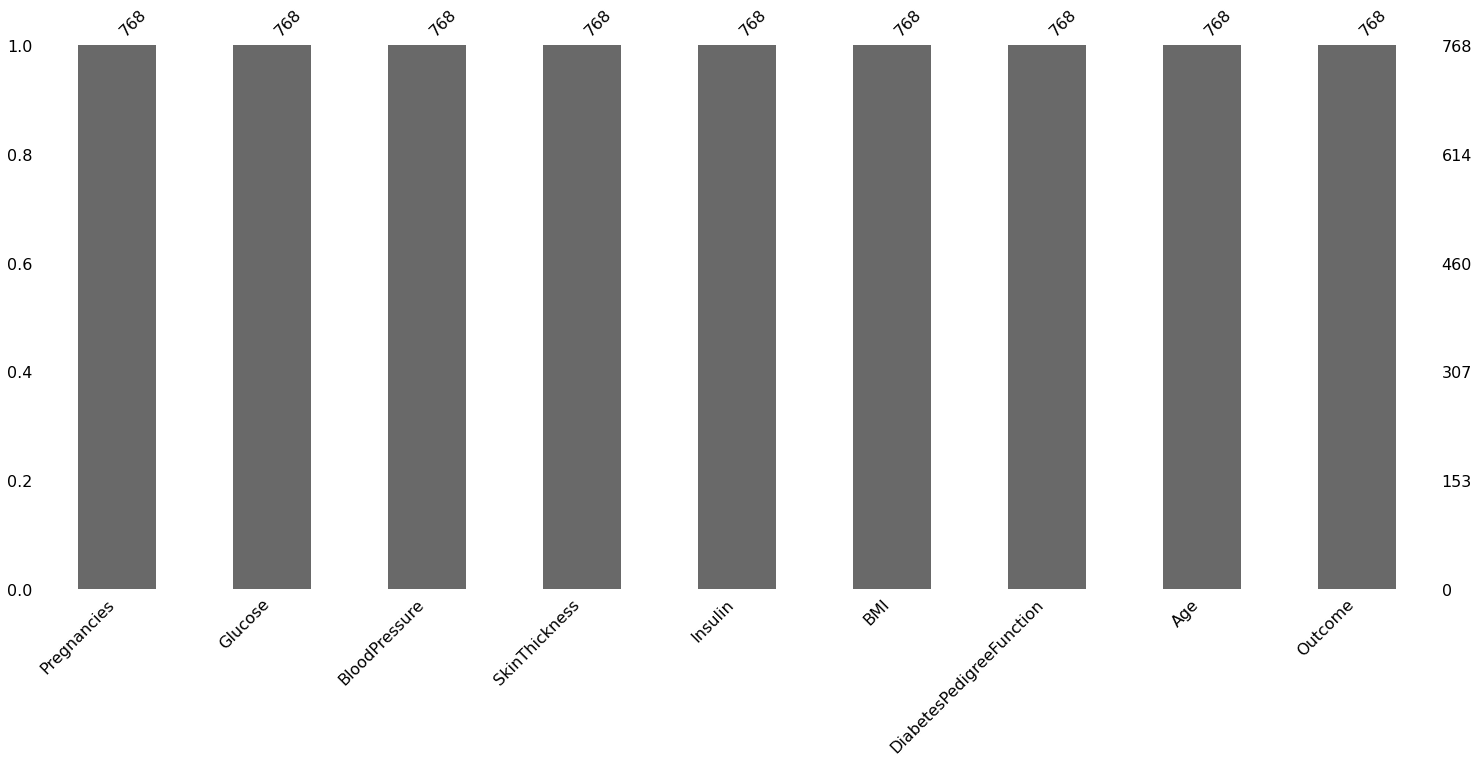

In [5]:
import missingno as msno
msno.bar(df)

- No missing values

#### Distplot

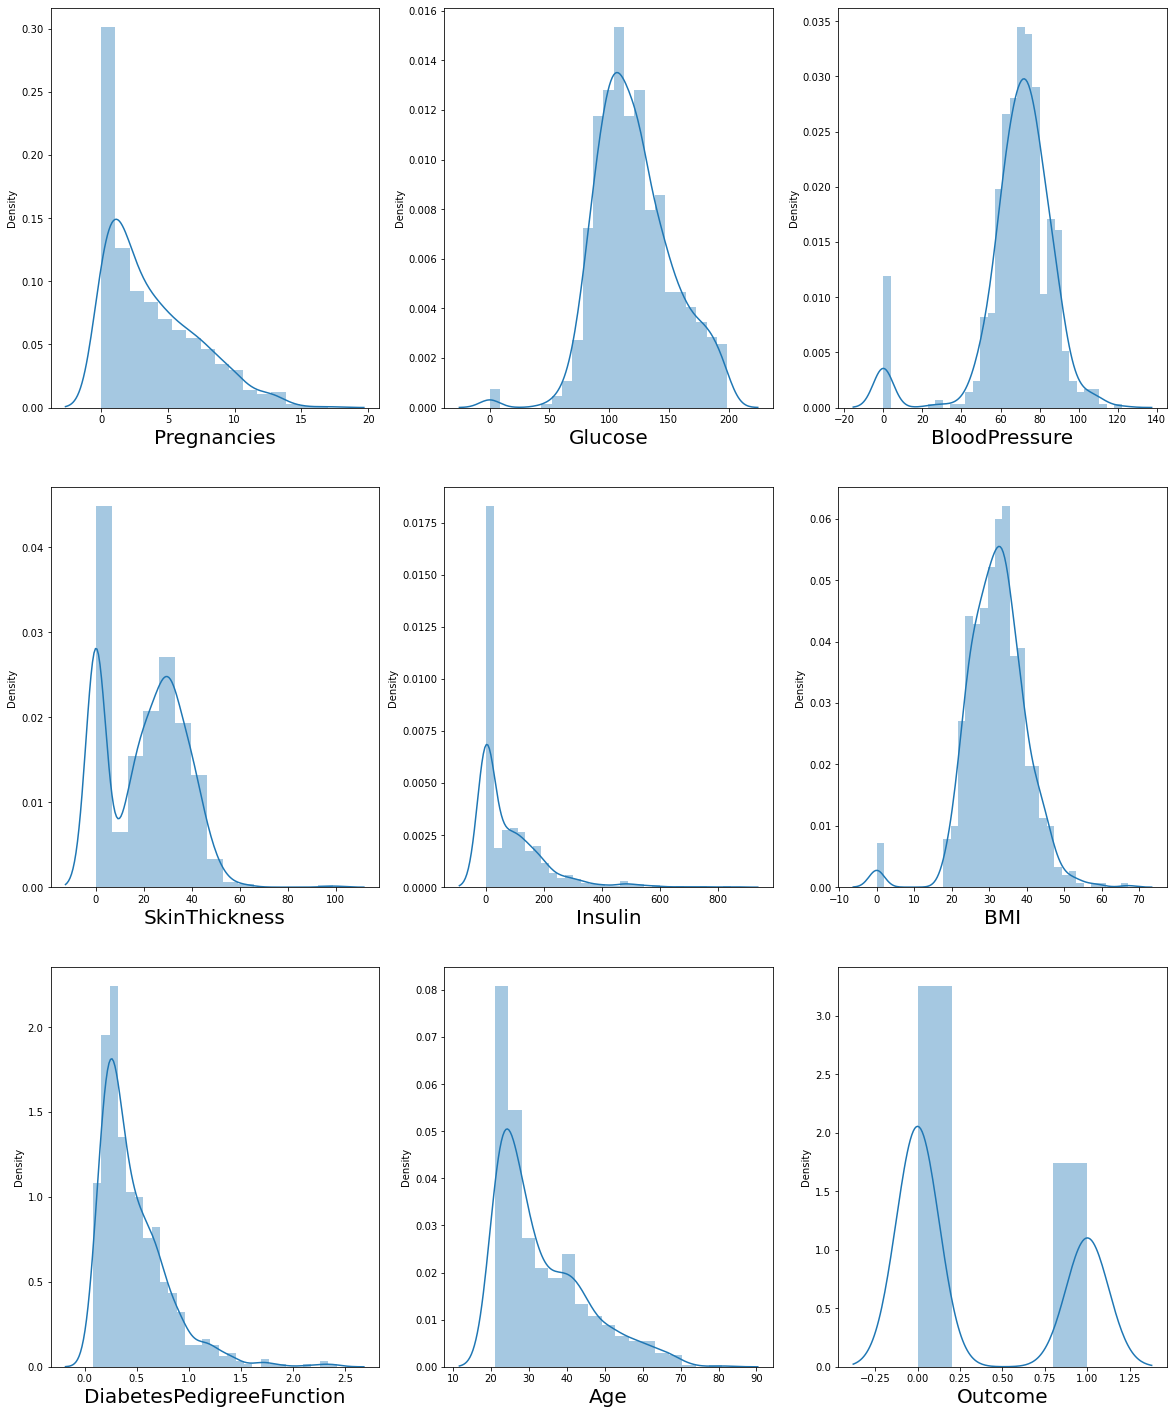

In [6]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- We will replace 0 by average in Glucose, BP, BMI, Insulin, Skin Thickness

In [7]:
# replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

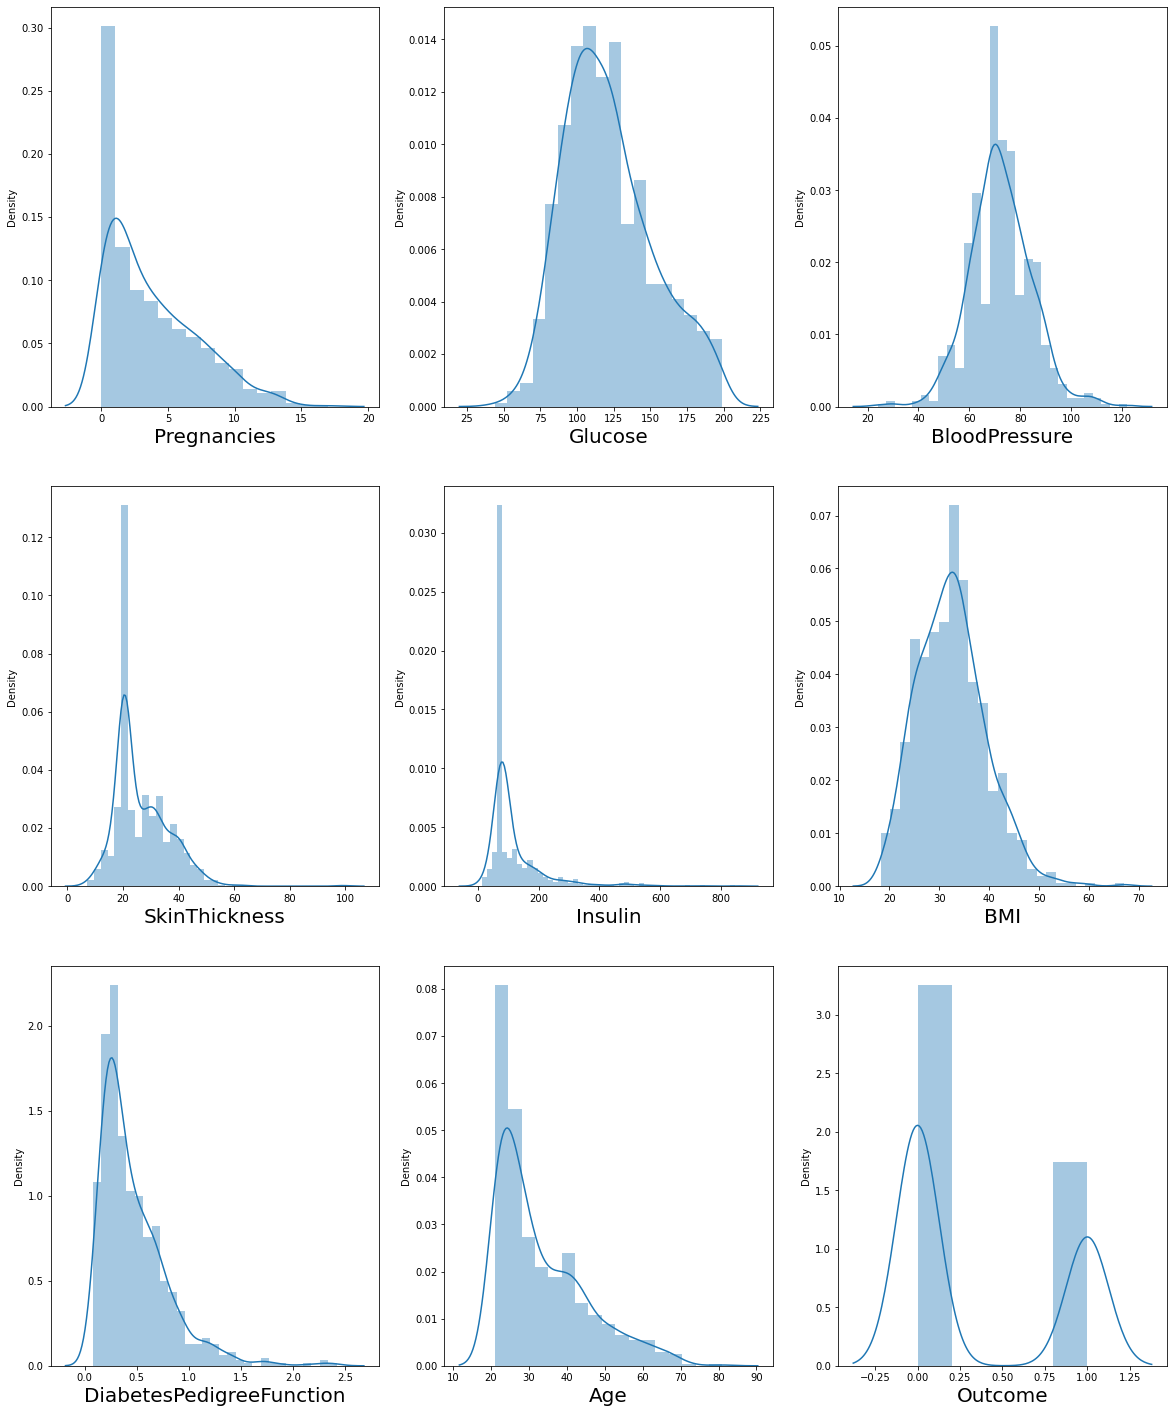

In [8]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

####  Checking outliers

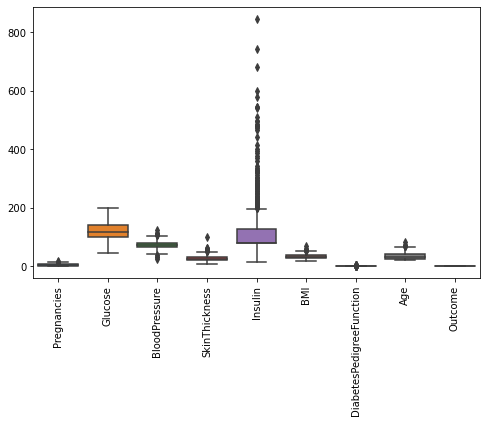

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.xticks(rotation=90);

- We will correct outliers by capping (upper limit 75 percentile and lower limit 25 percentile)

In [10]:
df1=df.copy()

In [11]:
for i in df1.columns:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df1[i] = np.where(df1[i] > upper_limit, upper_limit, np.where(df1[i] < lower_limit, lower_limit,
                                                       df1[i])) # for middle part of box which can be

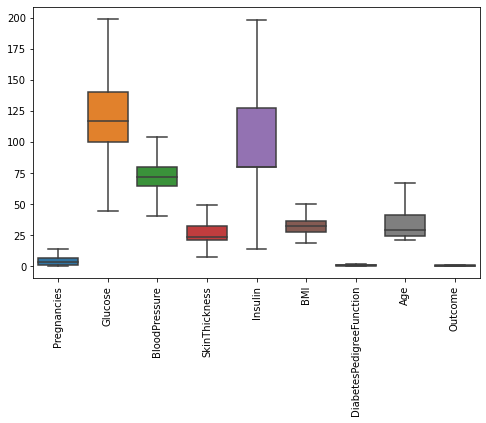

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1)
plt.xticks(rotation=90);

#### Seggregate X and Y

In [13]:
x=df1.drop(columns="Outcome")
y=df1["Outcome"]

#### Features scaling

In [14]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

#### Dividing the data set into train and test

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=1200)

In [17]:
knn=KNeighborsClassifier()

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

#### Evaluate

In [20]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.734375

#### Checking on train data

In [21]:
y_pred_train=knn.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.8229166666666666

- Chances of overfitting as variance is high i.e. 82-73

####  hyperparameter Tuning

#### Seeing combination of hyperparameters by grid_search

In [22]:
grid_param = {
    'n_neighbors' : list(range(1,24,2))
   }

In [23]:
grid_search = GridSearchCV(knn,grid_param,verbose=3)

In [24]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.664 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.670 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.652 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.670 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.713 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.707 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;, score=0.713 total time=   0.0s
[CV 3/5] END .....................n_neighbors=3;, score=0.722 total time=   0.0s
[CV 4/5] END .....................n_neighbors=3;, score=0.765 total time=   0.0s
[CV 5/5] END .....................n_neighbors=3;, score=0.704 total time=   0.0s
[CV 1/5] END .....................n_neighbors=5;, score=0.724 total time=   0.0s
[CV 2/5] END .....................n_neighbors=5;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23]},
             verbose=3)

#### Lets see the best parameters according to gridsearch

In [25]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'n_neighbors': 15}


In [26]:
grid_search.best_score_  ## accuracy on training

0.7535532233883059

#### We will use the best parameters in our k-NN algorithm and check  if accuracy is increasing.

In [27]:
knn=KNeighborsClassifier(n_neighbors=15)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [29]:
knn.score(x_train,y_train)

0.8020833333333334

- Looks like accuracy for training has been decreased, maybe our model was overfitting the data before. Let's see how it performs on the test data.

In [30]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.7708333333333334

- Less variance.